In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing libraries

In [2]:
import pandas as pd
import numpy as np
#from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder, PolynomialFeatures,MinMaxScaler,OrdinalEncoder,Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score,train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve,SCORERS
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
from scipy.stats import uniform,truncnorm,randint
from sklearn.pipeline import make_pipeline,Pipeline
#import tensorflow
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import pickle
import itertools
from sklearn import model_selection
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from bioinfokit.visuz import cluster
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score, confusion_matrix, classification_report
#from sklearn.impute import IterativeImputer

#from sklearn.impute import IterativeImputer

from matplotlib import pyplot as plt
from matplotlib import pyplot


Importing data

In [3]:
#importing train data
data_Mercedes_train=pd.read_csv('/content/drive/MyDrive/ML_Data/train_Mercedes.csv')

In [4]:
data_Mercedes_test=pd.read_csv('/content/drive/MyDrive/ML_Data/test_Mercedes.csv')

Exploratory Data Analysis

In [5]:
#Viewing the train data
data_Mercedes_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Viewing the test data
data_Mercedes_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
data_Mercedes_train = data_Mercedes_train.drop(columns=['ID'])


In [8]:
data_Mercedes_test = data_Mercedes_test.drop(columns=['ID'])

In [9]:
#Viewing the train data
data_Mercedes_train.dtypes

y       float64
X0       object
X1       object
X2       object
X3       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 377, dtype: object

In [10]:
data_Mercedes_test.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 376, dtype: object

In [11]:
#Setting the columns
cols=data_Mercedes_train.columns
cols_test=data_Mercedes_test.columns

In [12]:
#Viewing the LabelEncoder for train data
lenc = LabelEncoder()
for x in cols:
    lenc = lenc.fit(data_Mercedes_train[x])
    data_Mercedes_train[x] = lenc.transform(data_Mercedes_train[x])

In [ ]:

#Viewing the LabelEncoder for test data
lenc = LabelEncoder()
for x in cols_test:
    lenc = lenc.fit(data_Mercedes_test[x])
    data_Mercedes_test[x] = lenc.transform(data_Mercedes_test[x])

In [ ]:
#Viewing the heads of the Mercedes train data
data_Mercedes_train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,2466,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,366,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,69,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,133,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,106,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking the sum of missing values for training data
data_Mercedes_train.isna().sum().sum()

0

In [ ]:
#Checking the sum of missing values for the testing data
data_Mercedes_test.isna().sum().sum()

0

In [ ]:
#Viewing the duplicate
data_Mercedes_test.duplicated().sum()

299

In [ ]:
#Viewing the duplicate
data_Mercedes_train.duplicated().sum()

1

In [ ]:
#Viewing the shape of the data
data_Mercedes_train.shape

(4209, 377)

In [ ]:
#Veiwing the shape of the data
data_Mercedes_test.shape

(4209, 376)

In [ ]:
#Describing the data
data_Mercedes_train.describe()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,1200.809931,29.760751,11.113566,17.306486,2.919696,2.997862,13.340223,6.807318,11.611309,0.013305,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,694.116229,13.738338,8.531001,10.899914,1.739912,0.073900,8.250832,2.916973,7.037888,0.114590,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,575.000000,19.000000,3.000000,8.000000,2.000000,3.000000,5.000000,6.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1161.000000,35.000000,13.000000,16.000000,2.000000,3.000000,15.000000,7.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1784.000000,43.000000,20.000000,25.000000,5.000000,3.000000,21.000000,9.000000,18.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2544.000000,46.000000,26.000000,43.000000,6.000000,3.000000,28.000000,11.000000,24.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#describing the test data
data_Mercedes_test.describe()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,30.515324,11.075315,17.780708,2.933476,2.997149,15.023046,6.850558,11.558090,0.019007,0.000238,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,15.221177,8.544520,10.227319,1.776977,0.078553,8.667149,2.868017,7.016379,0.136565,0.015414,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,10.000000,2.000000,3.000000,6.000000,6.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,13.000000,17.000000,2.000000,3.000000,17.000000,7.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,20.000000,23.000000,5.000000,3.000000,23.000000,9.000000,18.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,26.000000,44.000000,6.000000,3.000000,31.000000,11.000000,24.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Subsetting the train data
train_data= data_Mercedes_train.loc[:,data_Mercedes_train.std()!=0]


In [ ]:
# Applying Standard Scaler
std_scal = StandardScaler()
std_scal.fit(train_data[['y']])
std_scal.mean_
train_data['y_std'] = std_scal.transform(train_data[['y']])
train_data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y_std
0,2466,32,23,17,0,3,24,9,14,0,...,0,1,0,0,0,0,0,0,0,1.822952
1,366,32,21,19,4,3,28,11,14,0,...,0,0,0,0,0,0,0,0,0,-1.202838
2,69,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,1,0,0,0,-1.630771
3,133,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,-1.538556
4,106,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,-1.577459


In [ ]:
#Dropping y from the train data
Features= train_data.drop(['y','y_std'],axis=1)

In [ ]:
#Setting the y from the standard
Target= train_data['y_std']

In [ ]:
#Finding the correlation Analysis
data_corr=Features.corr()
data_corr

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X0,1.000000,-0.271123,-0.139904,-0.070645,0.017988,0.012293,0.037549,0.047735,0.081122,-0.134577,...,0.113272,0.070546,0.045173,-0.102136,0.083352,-0.038618,-0.060401,-0.011174,0.009110,0.011660
X1,-0.271123,1.000000,0.088266,0.205657,-0.020724,0.046417,-0.079119,-0.000306,-0.137193,0.112263,...,0.056874,-0.102424,-0.248791,0.145282,0.070753,-0.022360,0.120044,-0.029253,0.017603,0.008356
X2,-0.139904,0.088266,1.000000,-0.093546,0.002289,-0.017722,0.065778,-0.069932,0.042398,0.131464,...,-0.174308,0.033697,0.122503,0.131974,0.033645,0.006473,0.024392,-0.019873,-0.002614,-0.004529
X3,-0.070645,0.205657,-0.093546,1.000000,0.015298,-0.008161,-0.048468,-0.001249,0.019663,0.056166,...,0.051801,-0.105009,-0.588272,0.173723,-0.026446,0.004166,-0.046271,-0.028280,0.007273,0.045180
X4,0.017988,-0.020724,0.002289,0.015298,1.000000,0.039778,0.027854,-0.008909,0.003360,0.008245,...,-0.021598,0.007132,0.012692,0.004204,0.002835,0.002611,0.002533,0.001181,0.000631,0.001093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.038618,-0.022360,0.006473,0.004166,0.002611,0.010434,-0.014059,0.009511,-0.010479,-0.005566,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.060401,0.120044,0.024392,-0.046271,0.002533,-0.031128,0.054548,-0.000996,-0.010164,-0.024937,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,-0.011174,-0.029253,-0.019873,-0.028280,0.001181,-0.007337,-0.021293,0.038712,-0.004740,-0.011628,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,0.009110,0.017603,-0.002614,0.007273,0.000631,0.007030,0.023867,0.008950,-0.002532,-0.006212,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


<Axes: >

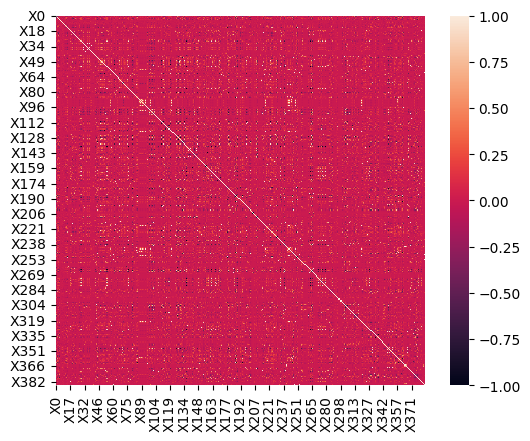

In [ ]:
#correlation heatmap
import matplotlib as plt
%matplotlib inline
sns.heatmap(data =data_corr ,square = True)

<Axes: ylabel='count'>

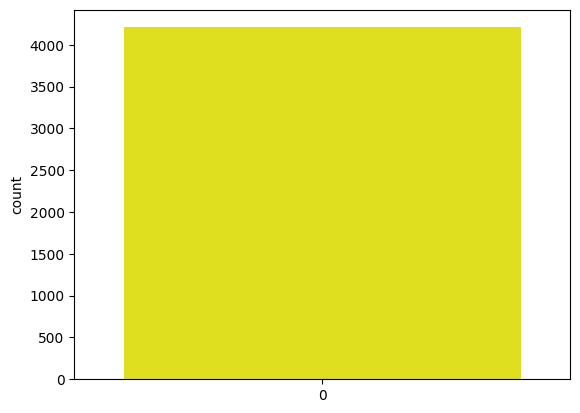

In [ ]:
#Plotting the dependent variable y
sns.countplot(train_data['y'], color='yellow')

In [ ]:
#Spliting the data into x_train, y_train, x_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(Features,Target, random_state= 10)

Applying PCA


In [ ]:
#Building the components of the model
pca = PCA(n_components=80) # recommendation is always keep n_components = 0.8as it will capture 80% of the variance
my_PC_model = pca.fit(X_train)
params = {'n_components':[10,20,30,40,50,60,70,80]}

In [ ]:
#Applying the GridSearch
grid_search = GridSearchCV(my_PC_model, params, cv = 3, n_jobs = -1)

In [ ]:
#Applying the grid search to the X_train
grid_search.fit(X_train)

GridSearchCV(cv=3, estimator=PCA(n_components=80), n_jobs=-1,
             param_grid={'n_components': [10, 20, 30, 40, 50, 60, 70, 80]})

In [ ]:
#Setting the best params
grid_search.best_params_

{'n_components': 80}

In [ ]:
#PCA Components
pca = PCA(n_components=80) # recommendation is always keep n_components = 0.8as it will capture 80% of the variance
my_PC_model = pca.fit(X_train)

In [ ]:
#Get Eignevalues
pca.explained_variance_ratio_

array([3.79406797e-01, 2.15685338e-01, 1.31236793e-01, 1.20658373e-01,
       9.32707179e-02, 1.57993809e-02, 7.44698638e-03, 4.39299530e-03,
       2.92447588e-03, 2.41712845e-03, 2.33840024e-03, 2.02136338e-03,
       1.69013132e-03, 1.44939726e-03, 1.30342354e-03, 1.01209592e-03,
       9.47061915e-04, 9.01544600e-04, 7.84519031e-04, 7.12999416e-04,
       6.42433131e-04, 6.29346219e-04, 5.74023045e-04, 5.22528599e-04,
       4.89667840e-04, 4.35161224e-04, 4.21764228e-04, 3.86695233e-04,
       3.63599442e-04, 3.52310870e-04, 3.37696707e-04, 3.15510397e-04,
       2.96505116e-04, 2.89030060e-04, 2.70653250e-04, 2.51685358e-04,
       2.27234441e-04, 2.19407164e-04, 2.03180898e-04, 1.99438193e-04,
       1.88815418e-04, 1.78092504e-04, 1.74437034e-04, 1.73687560e-04,
       1.67124353e-04, 1.54190933e-04, 1.49364037e-04, 1.43955756e-04,
       1.40776175e-04, 1.37579916e-04, 1.35215596e-04, 1.31756510e-04,
       1.27040237e-04, 1.22761931e-04, 1.15379208e-04, 1.11612915e-04,
      

In [ ]:
# Cumulative proportion of variance (from PC1 to PC6)
np.cumsum(pca.explained_variance_ratio_)

array([0.3794068 , 0.59509214, 0.72632893, 0.8469873 , 0.94025802,
       0.9560574 , 0.96350439, 0.96789738, 0.97082186, 0.97323899,
       0.97557739, 0.97759875, 0.97928888, 0.98073828, 0.9820417 ,
       0.9830538 , 0.98400086, 0.9849024 , 0.98568692, 0.98639992,
       0.98704236, 0.9876717 , 0.98824573, 0.98876825, 0.98925792,
       0.98969308, 0.99011485, 0.99050154, 0.99086514, 0.99121745,
       0.99155515, 0.99187066, 0.99216716, 0.99245619, 0.99272685,
       0.99297853, 0.99320577, 0.99342517, 0.99362836, 0.99382779,
       0.99401661, 0.9941947 , 0.99436914, 0.99454283, 0.99470995,
       0.99486414, 0.99501351, 0.99515746, 0.99529824, 0.99543582,
       0.99557103, 0.99570279, 0.99582983, 0.99595259, 0.99606797,
       0.99617958, 0.99628997, 0.99639294, 0.99649454, 0.99659465,
       0.99668854, 0.99677877, 0.99686751, 0.99695263, 0.99703157,
       0.99711034, 0.99718759, 0.99726366, 0.99733461, 0.99740332,
       0.99746986, 0.99753467, 0.99759817, 0.99765982, 0.99772

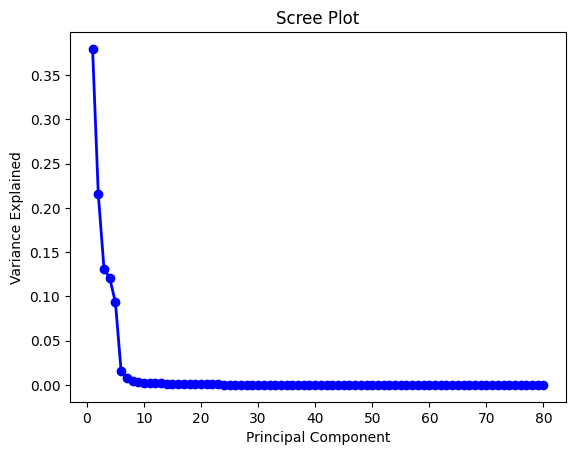

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Apply the components to the X_train and X_test data

In [ ]:
#Applying the pca to X_train and X_test
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)


In [ ]:
#viewing the transformed shape for X_train and X_test
X_train_transformed.shape

(3156, 80)

In [ ]:
#Viewing the transformed shape for X_test
X_test_transformed.shape

(1053, 80)

In [ ]:
#X_train_tranformed
X_train_transformed

array([[-5.23083489e+00,  8.45349080e-01, -2.66654911e+00, ...,
         7.32631403e-02,  1.00517006e-01, -1.70839664e-01],
       [ 1.43536770e+01, -1.56593736e+01, -3.27983108e+00, ...,
        -1.98874374e-01, -1.91818227e-01,  1.47299471e-01],
       [ 2.26985733e+01,  1.70446528e+01, -1.05500541e+01, ...,
        -8.15234286e-02,  1.30838034e-02, -2.42527984e-02],
       ...,
       [ 2.24133165e+01,  1.66337962e+01,  4.99250526e+00, ...,
         7.36648251e-02,  4.87082926e-02,  1.52880055e-02],
       [ 5.30763631e-02, -1.41364948e+01, -8.14453092e+00, ...,
        -6.59635026e-02, -7.62080610e-02,  8.88877020e-02],
       [-1.43398185e+01,  1.30056222e+01, -1.36404930e+01, ...,
         1.26091109e-01, -2.30603118e-02,  4.68306508e-02]])

In [ ]:
#Inverse the X_train_transformed
pca.inverse_transform(X_train_transformed).shape

(3156, 364)

In [ ]:
#Inverse the X_test_transformed
pca.inverse_transform(X_test_transformed).shape

(1053, 364)

Using Machine Learning XGBoost

In [ ]:
#Setting up the XGBoost for the Linear Model
xgb = XGBRegressor(objective= 'reg:linear')
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Evaluating the model on the test data

In [ ]:
#Predicting the Model
preds_train = xgb.predict(X_train)
preds_test = xgb.predict(X_test)

In [ ]:
#Printing the RMS Error from the model
print('XGBoosting:\n> RMSE on training data = {:.4f}\n> RMSE on validation data = {:.4f}'.format(
    np.sqrt(mean_squared_error(y_true=y_train, y_pred=preds_train)),
    np.sqrt(mean_squared_error(y_true=y_test, y_pred=preds_test))
))

XGBoosting:
> RMSE on training data = 0.3100
> RMSE on validation data = 0.6447


In [ ]:
#Early stopping
xgb_es = XGBRegressor(objective= 'reg:linear')

eval_set = [(X_test, y_test)]
xgb_es.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.81400
[1]	validation_0-rmse:0.70495
[2]	validation_0-rmse:0.64600
[3]	validation_0-rmse:0.61452
[4]	validation_0-rmse:0.59854
[5]	validation_0-rmse:0.59261
[6]	validation_0-rmse:0.58902
[7]	validation_0-rmse:0.58841
[8]	validation_0-rmse:0.58741
[9]	validation_0-rmse:0.58792
[10]	validation_0-rmse:0.59249
[11]	validation_0-rmse:0.59440
[12]	validation_0-rmse:0.59493
[13]	validation_0-rmse:0.59475
[14]	validation_0-rmse:0.59476
[15]	validation_0-rmse:0.59766
[16]	validation_0-rmse:0.59762
[17]	validation_0-rmse:0.59987
[18]	validation_0-rmse:0.59894
[19]	validation_0-rmse:0.60221
[20]	validation_0-rmse:0.60361
[21]	validation_0-rmse:0.60384
[22]	validation_0-rmse:0.60406
[23]	validation_0-rmse:0.60395
[24]	validation_0-rmse:0.60472
[25]	validation_0-rmse:0.60525
[26]	validation_0-rmse:0.60539
[27]	validation_0-rmse:0.60577
[28]	validation_0-rmse:0.60660


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
#Printing the RMSE afte evaluating the model
print('XGBoosting:\n> RMSE on training data = {:.4f}\n> RMSE on validation data = {:.4f}'.format(
    np.sqrt(mean_squared_error(y_true=y_train, y_pred=preds_train)),
    np.sqrt(mean_squared_error(y_true=y_test, y_pred=preds_test))
))

XGBoosting:
> RMSE on training data = 0.3100
> RMSE on validation data = 0.6447


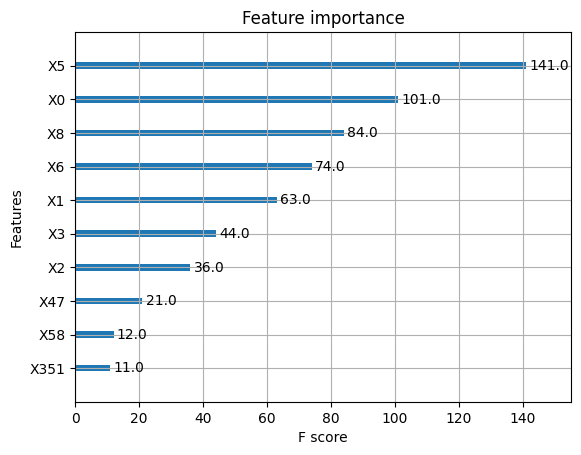

In [ ]:
# Plot feature importance
plot_importance(xgb_es, max_num_features=10)
plt.show()

# Using gridSearch

In [ ]:
#Assigning the XGBoost
xgb_grid = XGBRegressor(objective= 'reg:linear')

In [ ]:
#Setting the Parameters
parameters = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]}

In [ ]:
#Fitting the Parameters
fit_params={"early_stopping_rounds":10,
            "eval_metric" : "rmse",
            "eval_set" : [[X_test, y_test]]}

In [ ]:
#Applying the GridSearch
cv = 5

grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    #cv = TimeSeriesSplit(n_splits=cv).get_n_splits([X_trainX, y_train]),
    verbose=1)

xgb_grid_model = grid_search.fit(X_train, y_train, **fit_params)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[0]	validation_0-rmse:0.81591
[1]	validation_0-rmse:0.70656
[2]	validation_0-rmse:0.65621
[3]	validation_0-rmse:0.62960
[4]	validation_0-rmse:0.61689
[5]	validation_0-rmse:0.61235
[6]	validation_0-rmse:0.61186
[7]	validation_0-rmse:0.61284
[8]	validation_0-rmse:0.61446
[9]	validation_0-rmse:0.61725
[10]	validation_0-rmse:0.61920
[11]	validation_0-rmse:0.62017
[12]	validation_0-rmse:0.62369
[13]	validation_0-rmse:0.62670
[14]	validation_0-rmse:0.63158
[15]	validation_0-rmse:0.63260


In [ ]:
#Printing the best parameters
print('Best Parameter:')
print(xgb_grid_model.best_params_)
print(xgb_grid_model.best_estimator_)

Best Parameter:
{'colsample_bytree': 0.7, 'max_depth': 20, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.3, 'subsample': 0.7}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


In [ ]:
#Predicting the X_train & Y_train
preds_train = xgb_grid_model.predict(X_train)
preds_test = xgb_grid_model.predict(X_test)

print('XGBoosting:\n> RMSE on training data = {:.4f}\n> RMSE on validation data = {:.4f}'.format(
    np.sqrt(mean_squared_error(y_true=y_train, y_pred=preds_train)),
    np.sqrt(mean_squared_error(y_true=y_test, y_pred=preds_test))
))

XGBoosting:
> RMSE on training data = 0.4631
> RMSE on validation data = 0.6119
